<a href="https://colab.research.google.com/github/sharon-raj-1718/cifar_10_various-cnn-_models-_with_GUI/blob/main/model2_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test)=cifar10.load_data()

print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of x_test is {}'.format(x_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

170500096/170498071 [==============================] - 4s 0us/step
Shape of x_train is (50000, 32, 32, 3)
Shape of x_test is (10000, 32, 32, 3)
Shape of y_train is (50000, 1)
Shape of y_test is (10000, 1)


In [2]:
from tensorflow.keras.utils import to_categorical

# Normalizing
x_train=x_train/255
x_test=x_test/255

#One hot encoding
y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input, AveragePooling2D, Activation,Conv2D, MaxPooling2D, BatchNormalization,Concatenate
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
model2=Sequential()
model2.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25)) # Drop 25% of the units from the layer.
model2.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(256,activation='relu'))
model2.add(Dense(10,activation='softmax'))
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# training_steps = train_generator.samples//train_generator.batch_size
# validation_steps=test_generator.samples//test_generator.batch_size
# model2.fit_generator(train_generator,epochs=100,steps_per_epoch=training_steps,validation_data=test_generator,validation_steps=validation_steps,callbacks=[board])
history2=model2.fit(x_train,y_train_cat,epochs=20,validation_data=(x_test,y_test_cat))

Epoch 1/20
1563/1563 [==============================] - 39s 5ms/step - loss: 1.5674 - accuracy: 0.4295 - val_loss: 1.2897 - val_accuracy: 0.5448
Epoch 2/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2570 - accuracy: 0.5528 - val_loss: 1.0933 - val_accuracy: 0.6138
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1210 - accuracy: 0.6036 - val_loss: 1.0567 - val_accuracy: 0.6279
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0328 - accuracy: 0.6363 - val_loss: 0.9512 - val_accuracy: 0.6640
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9645 - accuracy: 0.6612 - val_loss: 0.9310 - val_accuracy: 0.6790
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9107 - accuracy: 0.6795 - val_loss: 0.9063 - val_accuracy: 0.6874
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8650 - accuracy: 0.6960 - val_loss: 0.9519 - val_accuracy

In [6]:
evaluation = model2.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.8945 - accuracy: 0.7079
Test Accuracy: 0.7078999876976013


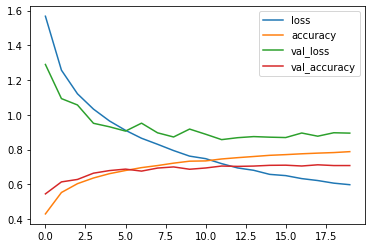

In [8]:
import pandas as pd
pd.DataFrame(history2.history).plot()

In [9]:
model2.save("model2_cifar_20epoch_dropout.h5")